# Modelo predictivo para Megaline
## Introduccion

La compañía móvil Megaline no está satisfecha al ver que muchos de sus clientes utilizan planes heredados. Quieren desarrollar un modelo que pueda analizar el comportamiento de los clientes y recomendar uno de los nuevos planes de Megaline: Smart o Ultra.

Para desarrollar este proyecto se analizaran los datos proporcionados correspondientes a los usuarios, los planes que contrataron y sus comportamientos. Basandonos en la informacion, realizaremos un modelo predictivo de clasificacion para que la compañia de Megaline pueda realizar las recomendaciones basado en un modelo que nos permita acceder a la mayor certeza posible al ser entrenado.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df_user_behavior = pd.read_csv('users_behavior.csv')

print(df_user_behavior.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB
None


# Descripción de datos
Cada observación en el dataset contiene información del comportamiento mensual sobre un usuario. La información dada es la siguiente:

- сalls — número de llamada
- minutes — duración total de la llamada en minutos,
- messages — número de mensajes de texto,
- mb_used — Tráfico de Internet utilizado en MB,
- is_ultra — plan para el mes actual (Ultra - 1, Smart - 0).

In [3]:
print(df_user_behavior.head())

   calls  minutes  messages   mb_used  is_ultra
0   40.0   311.90      83.0  19915.42         0
1   85.0   516.75      56.0  22696.96         0
2   77.0   467.66      86.0  21060.45         0
3  106.0   745.53      81.0   8437.39         1
4   66.0   418.74       1.0  14502.75         0


# Plan Ultra

In [4]:

df_ultra = df_user_behavior[df_user_behavior['is_ultra'] == 1]
print(df_ultra.head())
print()
print(df_ultra.describe().round())


    calls  minutes  messages   mb_used  is_ultra
3   106.0   745.53      81.0   8437.39         1
6    57.0   431.64      20.0   3738.90         1
8     7.0    43.39       3.0   2538.67         1
10   82.0   560.51      20.0   9619.53         1
14  108.0   587.90       0.0  14406.50         1

       calls  minutes  messages  mb_used  is_ultra
count  985.0    985.0     985.0    985.0     985.0
mean    73.0    511.0      49.0  19469.0       1.0
std     44.0    308.0      48.0  10087.0       0.0
min      0.0      0.0       0.0      0.0       1.0
25%     41.0    276.0       6.0  11770.0       1.0
50%     74.0    503.0      38.0  19308.0       1.0
75%    104.0    730.0      79.0  26838.0       1.0
max    244.0   1632.0     224.0  49746.0       1.0


# Plan Smart

In [5]:
df_smart = df_user_behavior[df_user_behavior['is_ultra'] == 0]
print(df_smart.head())
print()
print(df_smart.describe().round())


   calls  minutes  messages   mb_used  is_ultra
0   40.0   311.90      83.0  19915.42         0
1   85.0   516.75      56.0  22696.96         0
2   77.0   467.66      86.0  21060.45         0
4   66.0   418.74       1.0  14502.75         0
5   58.0   344.56      21.0  15823.37         0

        calls  minutes  messages  mb_used  is_ultra
count  2229.0   2229.0    2229.0   2229.0    2229.0
mean     58.0    406.0      33.0  16208.0       0.0
std      26.0    185.0      28.0   5870.0       0.0
min       0.0      0.0       0.0      0.0       0.0
25%      40.0    274.0      10.0  12643.0       0.0
50%      60.0    411.0      28.0  16507.0       0.0
75%      76.0    530.0      51.0  20043.0       0.0
max     198.0   1390.0     143.0  38553.0       0.0


# Comportamiento del Usuario

## Calls

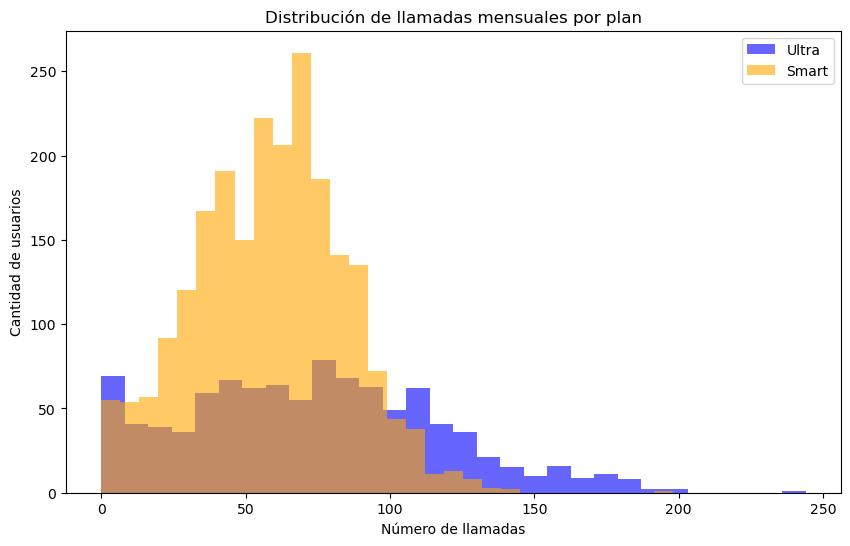

In [6]:


plt.figure(figsize=(10,6))
plt.hist(df_ultra['calls'], bins=30, alpha=0.6, label='Ultra', color='blue')
plt.hist(df_smart['calls'], bins=30, alpha=0.6, label='Smart', color='orange')
plt.xlabel('Número de llamadas')
plt.ylabel('Cantidad de usuarios')
plt.title('Distribución de llamadas mensuales por plan')
plt.legend()
plt.show()

### Calls Ultra (número de llamadas)
- Media: 73 llamadas al mes.
- Mediana: 74 (distribución bastante centrada).
- Rango: de 0 a 244 llamadas.
- Variabilidad: desviación estándar de 44 → bastante disperso, algunos usuarios llaman muchísimo más que otros.

### Calls Smart (número de llamadas)
- Media: 58 llamadas/mes.
- Mediana: 60.
- Rango: de 0 a 198 llamadas.
- Variabilidad: desviación estándar de 26, menos disperso que el plan Ultra, pero sigue habiendo usuarios con uso mucho mayor que la media.



## Minutes

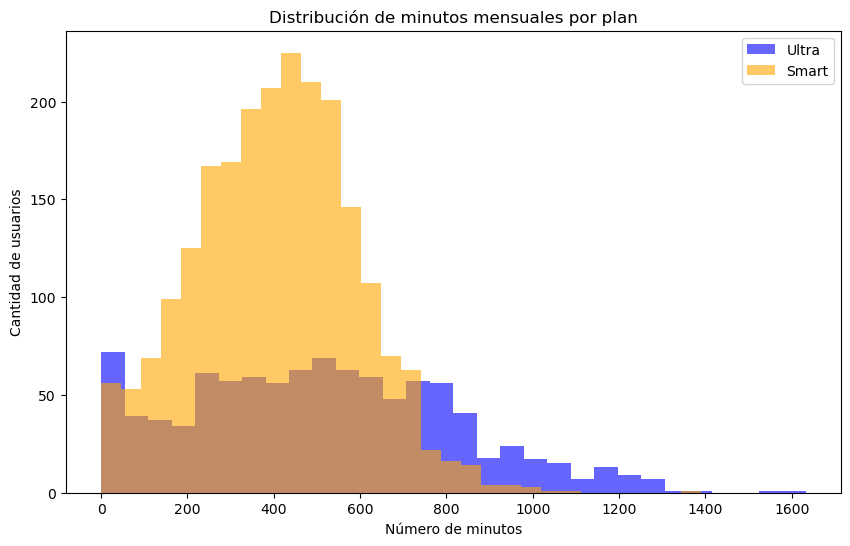

In [7]:
plt.figure(figsize=(10,6))
plt.hist(df_ultra['minutes'], bins=30, alpha=0.6, label='Ultra', color='blue')
plt.hist(df_smart['minutes'], bins=30, alpha=0.6, label='Smart', color='orange')
plt.xlabel('Número de minutos')
plt.ylabel('Cantidad de usuarios')
plt.title('Distribución de minutos mensuales por plan')
plt.legend()
plt.show()

### Minutes Ultra (minutos totales de llamadas)
- Media: 511 minutos/mes.
- Mediana: 503 minutos.
- Rango: de 0 a 1,632 minutos.
- Variabilidad: desviación estándar alta (308 min), lo que indica diferencias importantes entre usuarios.

### Minutes Smart (minutos totales de llamadas)
- Media: 406 min/mes.
- Mediana: 411 min.
- Rango: de 0 a 1,390 min.
- Variabilidad: desviación estándar de 185 min, menor que en el plan Ultra pero todavía considerable.



## Messages

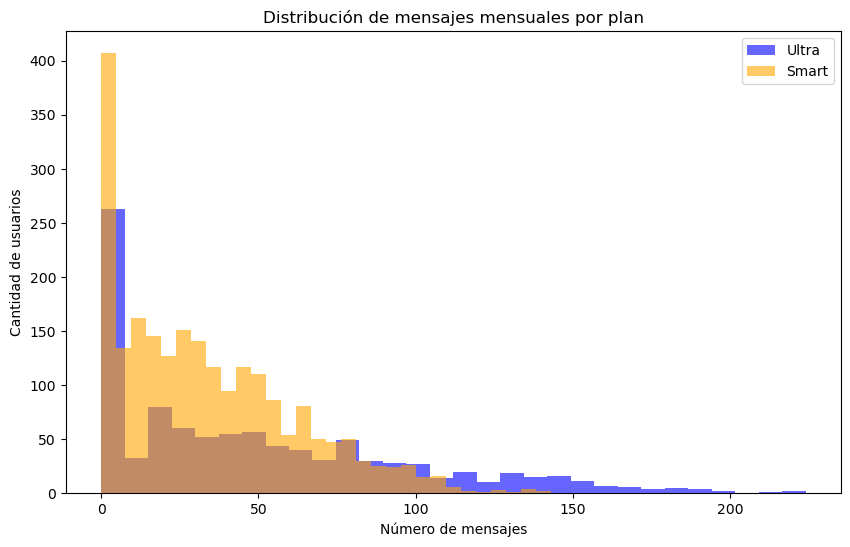

In [8]:
plt.figure(figsize=(10,6))
plt.hist(df_ultra['messages'], bins=30, alpha=0.6, label='Ultra', color='blue')
plt.hist(df_smart['messages'], bins=30, alpha=0.6, label='Smart', color='orange')
plt.xlabel('Número de mensajes')
plt.ylabel('Cantidad de usuarios')
plt.title('Distribución de mensajes mensuales por plan')
plt.legend()
plt.show()

### Messages Ultra (mensajes de texto enviados)
- Media: 49 mensajes/mes.
- Mediana: 38 (hay más usuarios enviando pocos mensajes que muchos).
- Rango: de 0 a 224 mensajes.
- Variabilidad: desviación estándar de 48 → comportamiento muy desigual.

### Messages Smart (mensajes enviados)
- Media: 33 mensajes/mes.
- Mediana: 28.
- Rango: de 0 a 143 mensajes.
- Variabilidad: desviación estándar de 28 → gran proporción de usuarios envía pocos mensajes.



## Mb Used

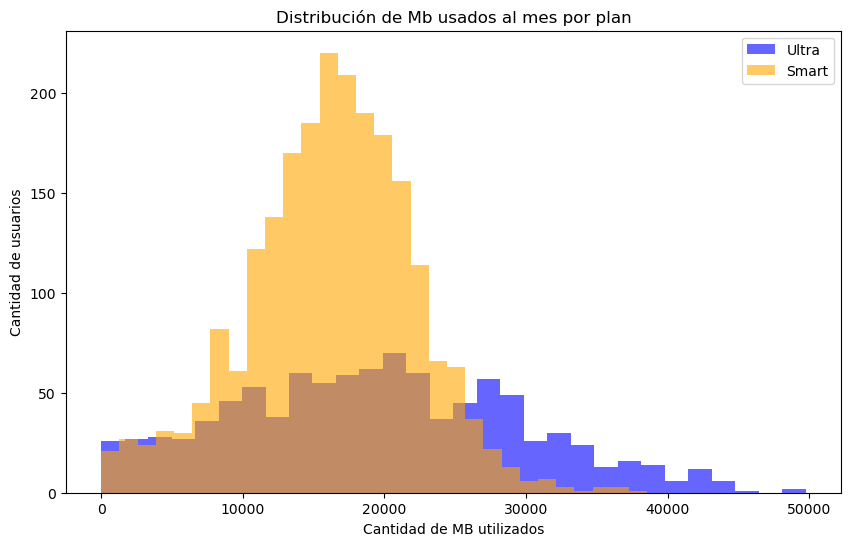

In [9]:
plt.figure(figsize=(10,6))
plt.hist(df_ultra['mb_used'], bins=30, alpha=0.6, label='Ultra', color='blue')
plt.hist(df_smart['mb_used'], bins=30, alpha=0.6, label='Smart', color='orange')
plt.xlabel('Cantidad de MB utilizados')
plt.ylabel('Cantidad de usuarios')
plt.title('Distribución de Mb usados al mes por plan')
plt.legend()
plt.show()

### Mb_used Ultra (uso de datos en MB)
- Media: 19,469 MB (19 GB) al mes.
- Mediana: 19,308 MB.
- Rango: de 0 a 49,746 MB (49 GB).
- Variabilidad: desviación estándar de 10,087 MB (~10 GB), lo que indica grandes diferencias en consumo de datos.

### Mb_used Smart (uso de datos en MB)
- Media: 16,208 MB (~16 GB) al mes.
- Mediana: 16,507 MB.
- Rango: de 0 a 38,553 MB (~38 GB).
- Variabilidad: desviación estándar de 5,870 MB (~5.8 GB) → menos dispersión que el plan Ultra.

### Conclusión sobre los gráficos de comportamiento del usuario

Al analizar los histogramas de llamadas, minutos, mensajes y uso de datos para ambos planes (Ultra y Smart), se observan diferencias claras en los patrones de consumo:

- **Llamadas y minutos:** Los usuarios del plan Ultra tienden a realizar más llamadas y acumular más minutos mensuales que los del plan Smart. Sin embargo, en ambos planes existe una gran dispersión, con algunos usuarios que apenas usan el servicio y otros que lo utilizan intensivamente.
- **Mensajes:** La mayoría de los usuarios envía pocos mensajes, pero hay una minoría significativa que envía muchos, especialmente en el plan Ultra. Esto genera una distribución sesgada hacia la izquierda.
- **Uso de datos (MB):** El consumo de datos es considerablemente mayor en el plan Ultra, aunque también hay usuarios del plan Smart con consumos elevados. La dispersión es alta en ambos casos, pero más pronunciada en Ultra.

En resumen, los usuarios del plan Ultra muestran un comportamiento de consumo más alto y variable en todos los servicios, mientras que los del plan Smart tienden a tener un uso más moderado y concentrado. Estas diferencias pueden ser útiles para segmentar usuarios y ajustar estrategias comerciales o de marketing.

# Entrenamiento de Modelos Predictivos (Clasificación)

En este apartado vamos a entrenar 3 diferentes modelos de predicción con sus respectivas clases:
- Modelo de Árbol > DecisionTreeClassifier
- Modelo de Bosque > RandomForestClassifier
- Modelo de Regresion Logistica > LogisticRegression

Para entrenamiento vamos a anlizar el nivel de certeza que tiene cada modelo para saber si alguno es igual al .75 (75%) o incluso mejor.

Se tomo el 25% del conjunto de datos para usarlos en comparacion con el modelo entrenado y entender la relacion de certeza con una muestra real.

## Modelo de Arbol

In [16]:

t_df_train,t_df_valid = train_test_split(df_user_behavior, random_state=54321, test_size =.25)

t_features_train = t_df_train.drop(['is_ultra'], axis = 1)
t_target_train = t_df_train['is_ultra']
t_features_valid = t_df_valid.drop(['is_ultra'],axis=1)
t_target_valid = t_df_valid['is_ultra']

t_best_score = 0
t_best_depth = 0

for t_depth in range(1,21):
    tree_model = DecisionTreeClassifier(random_state=54321, max_depth = t_depth)
    tree_model = tree_model.fit(t_features_train, t_target_train)
    tree_score = tree_model.score(t_features_valid, t_target_valid)
    if tree_score > t_best_score:
            t_best_score = tree_score
            t_best_depth = t_depth

print(f'La exactitud del mejor modelo en el conjunto de validacion (profundidad: {t_best_depth}): {t_best_score}')

La exactitud del mejor modelo en el conjunto de validacion (profundidad: 8): 0.7947761194029851


## Modelo de Bosque

In [15]:
f_df_train,f_df_valid = train_test_split(df_user_behavior, random_state=54321, test_size =.25)

f_features_train = f_df_train.drop(['is_ultra'], axis = 1)
f_target_train = f_df_train['is_ultra']
f_features_valid = f_df_valid.drop(['is_ultra'],axis=1)
f_target_valid = f_df_valid['is_ultra']


f_best_score = 0
f_best_est = 0
f_best_depth = 0



for est in range(10, 31, 10):
    for depth in range (1,11):
        forest_model = RandomForestClassifier(random_state=54321, n_estimators=est, max_depth = depth)
        forest_model = forest_model.fit(f_features_train,f_target_train)
        forest_score = forest_model.score(f_features_valid , f_target_valid)
        if forest_score > f_best_score:
            f_best_score = forest_score
            f_best_est = est
            f_best_depth = depth

print(f'Nivel de certeza del mejor modelo en el conjunto de validacion (numero de estimaciones:{f_best_est} | profundidad: {f_best_depth}): {f_best_score}')

Nivel de certeza del mejor modelo en el conjunto de validacion (numero de estimaciones:20 | profundidad: 9): 0.8072139303482587


## Modelo de Regresion Logistica

In [ ]:

r_df_train,r_df_valid = train_test_split(df_user_behavior, random_state=54321, test_size =.25)

r_features_train = r_df_train.drop(['is_ultra'], axis = 1)
r_target_train = r_df_train['is_ultra']
r_features_valid = r_df_valid.drop(['is_ultra'],axis=1)
r_target_valid = r_df_valid['is_ultra']

regression_model = LogisticRegression(random_state=54321)
regression_model = regression_model.fit(r_features_train, r_target_train)
regression_score = regression_model.score(r_features_valid,r_target_valid)

print(f'Nivel de certeza del modelo de Regresion Logistica es de: {regression_score}')


Nivel de certeza del modelo de Regresion Logistica es de: 0.7251243781094527


## Conclusion

Los modelos han sido entrenados y puestos a prueba, tal vez no se vean el numero de pruebas realizado, pero podemos observar los parametros donde acierta al valor maximo de certeza.

- El modelo de regresion quedara descartado al ser el que tuvo un nivel de certeza mas bajo y no pudo alcanzar el .75
- El modelo del arbol de decision, a pesar de que supero el .75 con .79, con una produndidad de 8, su nivel de certeza quedara en segundo lugar.
- En primer lugar, el mejor modelo nos ha dado un nivel de verteza de .8034, es decir .05 mas del umbral con el cual se esta comparando.